# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса XXX — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Проверим общую информацию по таблице:

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

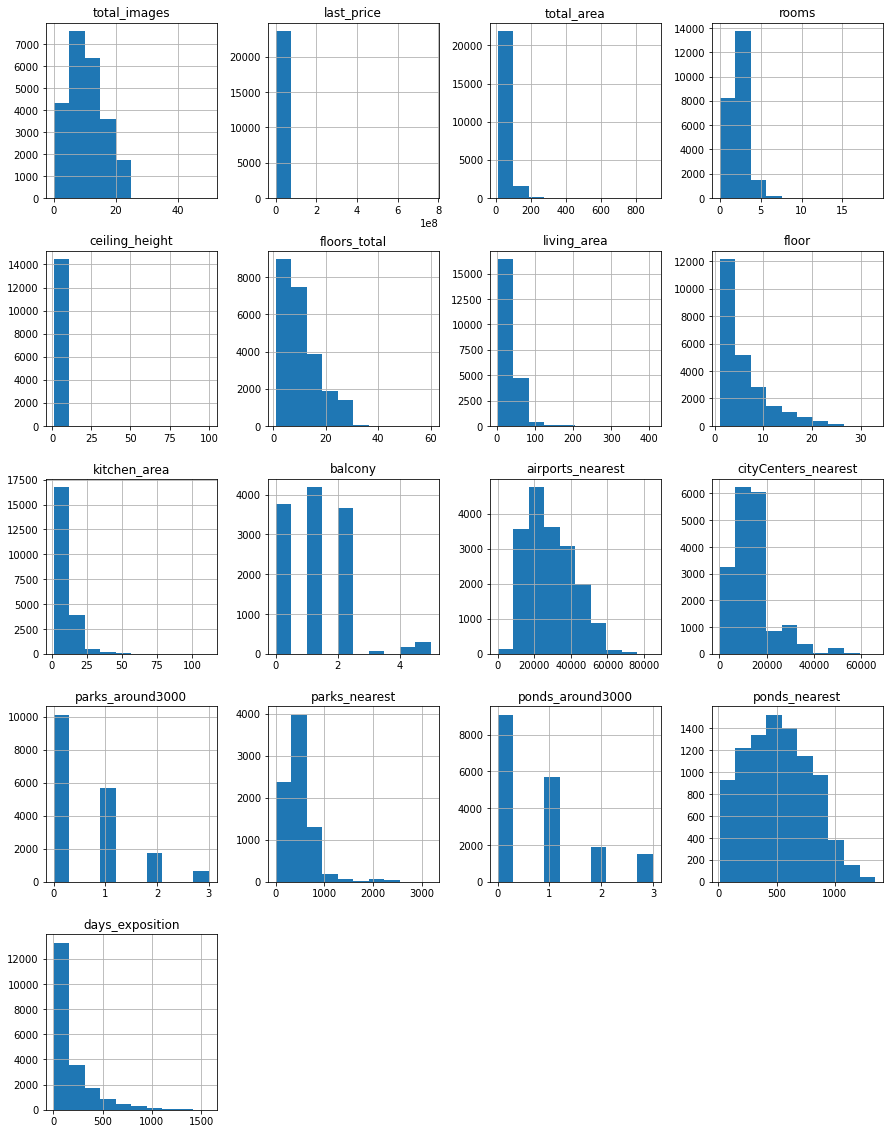

In [4]:
data.hist(figsize=(15, 20))

Из общей информации следует, что всего строк данных 23699, некоторые поля нуждаются в приведении к нормальному виду. Также есть пустые/незаполненные поля. Преимущественно поля, типа float64. На графиках видны выбросы. Данные нуждаются в предобработке.

### Выполните предобработку данных

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000':'ponds_around_3000'})

In [11]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Пустые значения у признака апартаментов ставим по умолчанию False:

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum().sort_values(ascending=False)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
data['ceiling_height'].median()

2.65

Медиана высоты потолков составляет 2.65, что соответствует ГОСТу и не испортит наши данные.

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isna().sum().sort_values(ascending=False)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [15]:
data['floors_total'].median()

9.0

Медиана количества этажей равна 9. В Санкт-Петербурге дома, преимущественно, 9-ти и 14-ти этажные. Следовательно значение подходит нашим данным.

In [16]:
data['floors_total'] = data['floors_total'].fillna(9.0)

In [17]:
# Мог использовать describe() для выбора между медианой или средним, но сообразил про это только на 4м задании.
data['living_area'].median()

30.0

In [18]:
data['living_area'].mean().round()

34.0

Так как по статистике на одного человека приемлемая жилая площадь - 33 кв.м., то нам больше подходит среднее значение. Применим его:

In [19]:
data['living_area'] = data['living_area'].fillna(data['living_area'].mean().round())
data.isna().sum().sort_values(ascending=False)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [20]:
data['kitchen_area'].median()

9.1

Медиана также, не навредит данным и подходит по общей статистике.

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data.isna().sum().sort_values(ascending=False)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Так как число балконов могли, попросту, не указывать, то релевантно приравнять пустые значения к 0.

In [25]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
locality_name              49
last_price                  0
balcony                     0
kitchen_area                0
total_images                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [46]:
data['locality_name'].sort_values().unique()

array(['unknown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

Значения поля locality_name необходимо почистить от неявных дубликатов. Необходимо заменить букву ё на е. И удалить все приставки с обозначением типа населенных пунктов. Название населенных пунктов nan заменим на unknown, так как оно лучше подходит по типу.

In [47]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок ', 'коттеджный ', 'городской '], '', regex=True)
)
data['locality_name'] = data['locality_name'].fillna('unknown')
data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
last_price                  0
locality_name               0
balcony                     0
kitchen_area                0
total_images                0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Проверим данные на полные явные дубликаты:

In [48]:
data[data.duplicated()].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

Полных дубликатов не найдено.
Так как релевантного значения для замены нет и у поля locality_name тип строки, который не будет влиять на вычисления, то пустые значения оставляем как есть

In [49]:
data['airports_nearest'].mean()

28793.67219254282

Для расстояния до ближайшего аэропорта и до центра будет достаточно среднего значения на замену

In [50]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].mean())
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [51]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].mean())
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Если не было указано парков, то принимаем число 0 за заполнение пустого значения, так как вполне вероятно, что значение не заполнялось, если парков не было по близости.

In [52]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

In [53]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around_3000           0
parks_nearest               0
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проделаем тоже самое с водоемами:

In [54]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3181
dtype: int64

Так как публикацию могли снять по разным причинам, ровно как и забыть убрать объявление(или некорректное заявление), то среднее значение не подойдет, следовательно возьмем медиану от days_exposition.

In [55]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

Причина появления пропусков - скорее всего, большинство значений было не обязательно к вводу. В таком случае, в случае, когда значение было равно 0 - значение не проставлялось человеком. Например - парки в радиусе 3км.
Возможно некоторые поля были необязательны к вводу и были пропущены неумышленно.
Также могли быть пропуски по каким либо техническим причинам, в таких полях как, например living_area.

Изменим типы данных колонок 'floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition' с float64 на int64, так как эти значения не могут быть числом с плавающей точкой, они исчисляются целыми числами. Также необходимо перевести first_day_exposition для дальнейшей работы с датами

In [56]:

for field in ['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']:
    try:
        data[field] = data[field].astype('int')
    except:
        print(f'Не удалось привести {field} к типу int')

        
try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
except:
    print('не удалось привести first_day_exposition к типу datetime')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositi

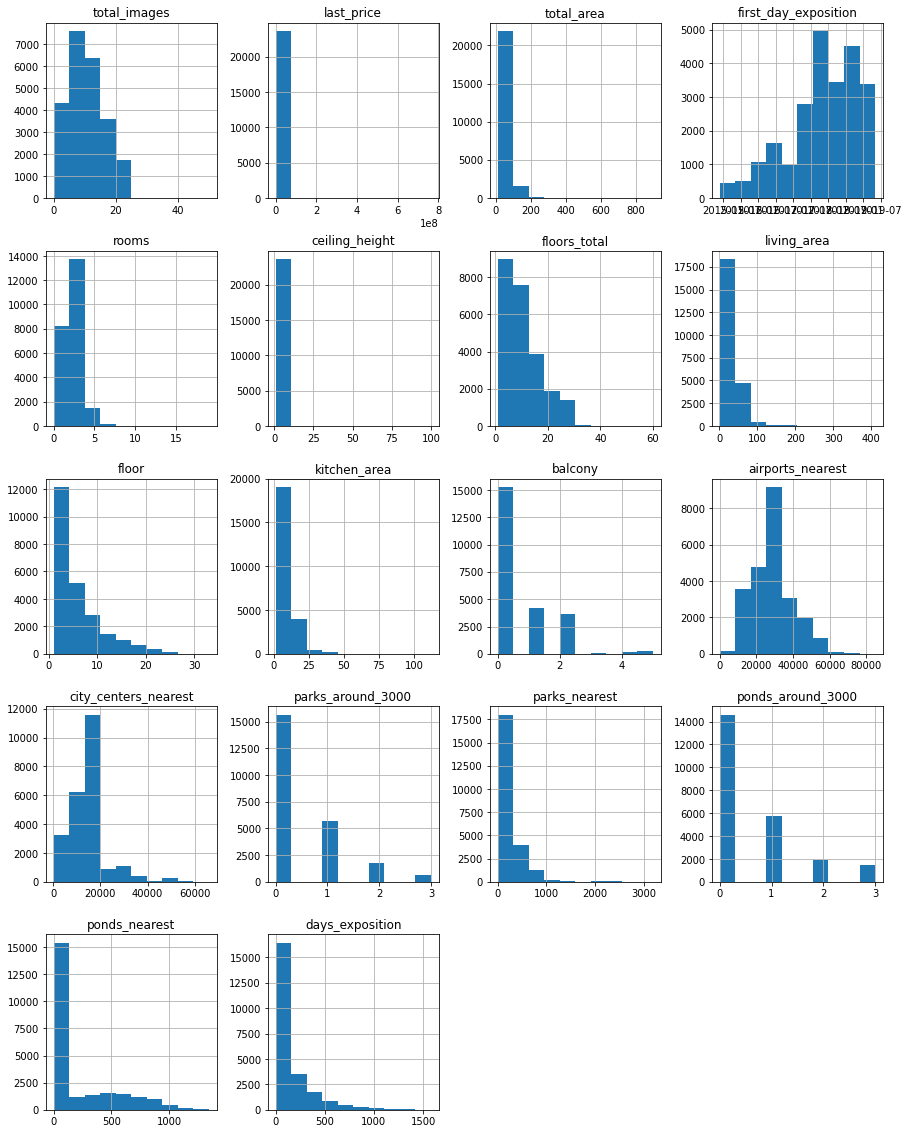

In [57]:
data.hist(figsize=(15, 20))

### Добавьте в таблицу новые столбцы

Рассчитаем и добавим следующие столбцы, которые помогут для дальнейшего исследования:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах

In [58]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

Так как чаще всего встречаются дом 9 и 14 этажей, но в нашей выборке 15ти этажных домов больше, чем 14, то принимаем 15 этаж как последний

In [59]:
data['one_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['floor_type'] = data.apply(categorize_floor, axis=1)
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round().astype('int')

In [60]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2,755.0,95,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,0,0.0,81,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,34.00,9,False,...,84.0,3,234.0,424,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0.0,0,0.0,55,95065.79,0,9,2018,другой,14
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,0,0.0,155,99195.71,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,34.00,22,False,...,0.0,0,0.0,95,110544.69,3,4,2019,другой,12
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0.0,0,0.0,189,87454.76,2,5,2018,другой,14
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,0,0.0,289,88524.59,6,2,2017,другой,15


### Проведите исследовательский анализ данных

12.0 900.0
23699
21756


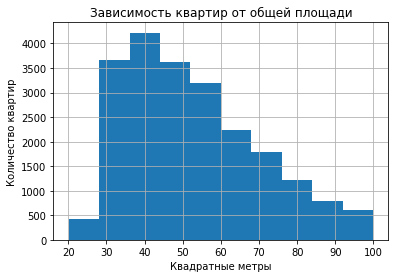

In [74]:
print(data['total_area'].min(), data['total_area'].max())
print(data['total_area'].count())
print(data[(data['total_area'] < 100) & (data['total_area'] > 20)]['total_area'].count())
plt.hist(data[(data['total_area'] < 100) & (data['total_area'] > 20)]['total_area'])
plt.grid()
plt.title('Зависимость квартир от общей площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
good_data = data[(data['total_area'] < 100) & (data['total_area'] > 20)]

**total_area**: для устранения аномалии были удалены данные выше 100 кв.м. и меьше 20 кв.м. Тем самым график стал больше похож на распределение Пуассона.

2.0 88.0
21756


Text(0, 0.5, 'Количество квартир')

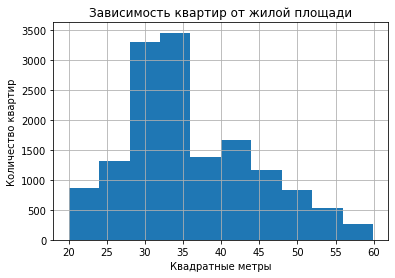

In [75]:
print(good_data['living_area'].min(), good_data['living_area'].max())
print(good_data['living_area'].count())
good_data = good_data.query('living_area > 20 and living_area < 60')
#print(data[(data['living_area'] > 22) & (data['living_area'] < 50)]['living_area'].count())
#data[(data['living_area'] > 22) & (data['living_area'] < 50)]['living_area'].hist()
#data = data[(data['living_area'] > 10) & (data['living_area'] < 50)]
#data['living_area'].hist()
plt.hist(good_data['living_area'])
plt.grid()
plt.title('Зависимость квартир от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

**living_area**: для устранения аномалий были удалены данные выше 60 и меньше 20 кв.м.

2.0 49.4
14738
14169


Text(0, 0.5, 'Количество квартир')

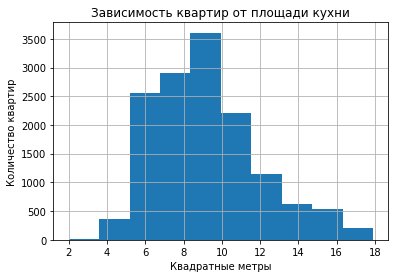

In [76]:
print(good_data['kitchen_area'].min(), good_data['kitchen_area'].max())
print(good_data['kitchen_area'].count())
good_data = good_data.query('kitchen_area < 18')
print(good_data['kitchen_area'].count())
plt.hist(good_data['kitchen_area'])
plt.grid()
plt.title('Зависимость квартир от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

**kitchen_area**: для устранения аномалий были удалены данные меньше 18 кв.м.

430000.0 40000000.0
14169


Text(0, 0.5, 'Количество квартир')

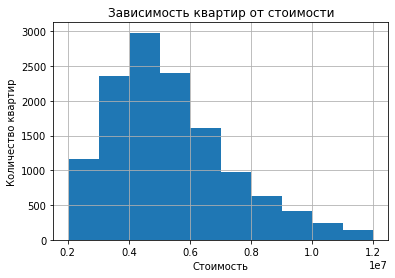

In [77]:
print(good_data['last_price'].min(), good_data['last_price'].max())
print(good_data['last_price'].count())
good_data = good_data.query('last_price < 12000000 and last_price > 2000000')
plt.hist(good_data['last_price'])
plt.grid()
plt.title('Зависимость квартир от стоимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')

**last_price**: для устранения аномалий были удалены данные, без ущерба анализу, больше 12млн рублей и меньше 2млн рублей, так как они не позволяли оценить картину.

Text(0, 0.5, 'Количество квартир')

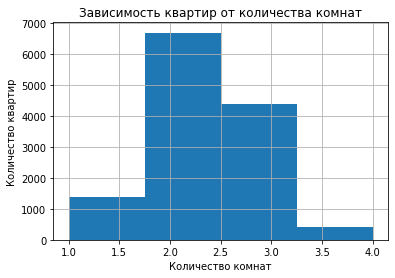

In [78]:
#good_data['rooms'].hist(bins=5)
#good_data.query('rooms > 0 and rooms < 5')['rooms'].hist(bins=4)
good_data = good_data.query('rooms > 0 and rooms < 5')
plt.hist(good_data['rooms'], bins=4)
plt.grid()
plt.title('Зависимость квартир от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

**rooms**: были найдены аномалии со значением 0 - так как отсутствие комнат невозможно. Также были удалены данные со значением 5, так как их было всего 15 и они не несли в себе информации для анализа.

Text(0, 0.5, 'Количество квартир')

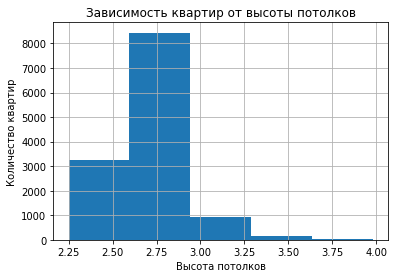

In [92]:
def normalize_data(height):
    if height > 24:
        return height / 10
    return height

good_data['ceiling_height'] = data['ceiling_height'].apply(normalize_data)
#good_data.query('ceiling_height > 24')['ceiling_height'] / 10
good_data = good_data.query('ceiling_height < 4 and ceiling_height > 2')
plt.hist(good_data['ceiling_height'], bins=5)
plt.grid()
plt.title('Зависимость квартир от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')

**ceiling_height**: были найдены аномалии в виде потолком больше 24 метров. Данные были поделены на 10, чтобы привести их к метрам. Оставшиеся большие значения были отброшены.

<AxesSubplot:title={'center':'Стоимость по типам этажей'}, ylabel='last_price'>

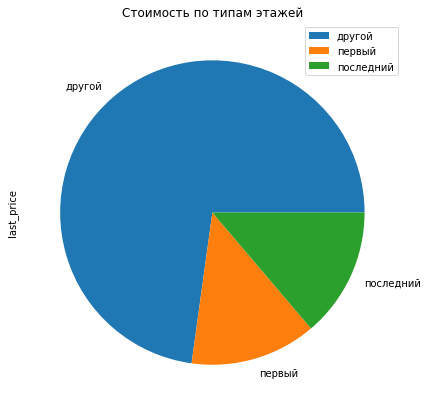

In [100]:
good_data.pivot_table(index='floor_type', values='last_price', aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), title='Стоимость по типам этажей')

**floor_type**: аномалий не найдено

In [83]:
good_data['floors_total'].describe()

count    12817.000000
mean        10.199267
std          6.153437
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0, 0.5, 'Количество квартир')

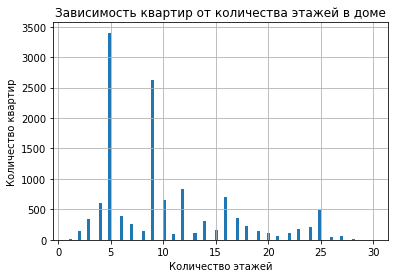

In [91]:
plt.hist(good_data['floors_total'], bins=100, range=(1,30))
plt.grid()
plt.title('Зависимость квартир от количества этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')

**floors_total**: аномалий не найдено

In [85]:
good_data['city_centers_nearest'].describe()

count    12817.000000
mean     14708.173999
std       7683.580864
min        208.000000
25%      11343.000000
50%      14191.277833
75%      15669.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Text(0, 0.5, 'Количество квартир')

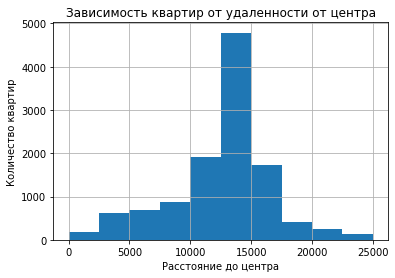

In [90]:
plt.hist(good_data['city_centers_nearest'], bins=10, range=(0,25000))
plt.grid()
plt.title('Зависимость квартир от удаленности от центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Количество квартир')

**city_centers_nearest**: аномалий не найдено

In [87]:
good_data['parks_nearest'].describe()

count    12817.000000
mean       165.560662
std        298.000157
min          0.000000
25%          0.000000
50%          0.000000
75%        306.000000
max       3064.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'Количество квартир')

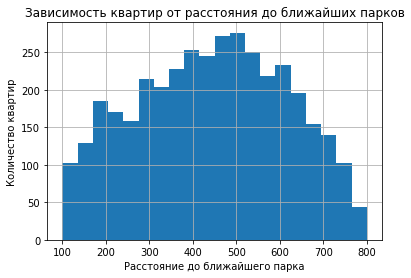

In [89]:
plt.hist(good_data['parks_nearest'], bins=20, range=(100,800))
plt.grid()
plt.title('Зависимость квартир от расстояния до ближайших парков')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')

**parks_nearest**: аномалий не найдено

**Вывод**:
 
   - На рынке самое большое предложение квартир с общей площадью от 28 до 60 кв. метров с максимумом приблизительно 100 кв. метров.
    
   - Больше всего продают квартир с жилой площадью с 27 кв. м по 36 кв. метров при этом прослеживается спад предложений в средней зоне 36-40 кв. метра.
    
   - Прослеживается тенденция что больше всего предложений с площадью кухни от 5 метров до 10.
    
   - Из гисторгаммы следует, что наиболее часто цена объекта составляет 3 - 6 миллниона.
    
   - Среди предложений больше всего двухкомнатных квартир. С увеличением комнат количество предложений снижается.
    
   - Среди большинства предложений высота составляет с 2.6 по 2.9 метров.
    
   - Менее ценными считаются квартиры на "первом" и "последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества.
   
   - Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках.
    
   - Больше всего предложений о продаже в спальных районах на окраинах города, на расстоянии 12000 -15000 метров.
    
   - Количество предложений не сильно зависит от расстояния до ближайшего парка. Большее расстояние до парка составляет 350 - 550 метров.

**Исследуем, как быстро продавались квартиры**:

In [93]:
good_data['days_exposition'].describe()

count    12817.000000
mean       163.737614
std        201.543882
min          1.000000
25%         45.000000
50%         95.000000
75%        190.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество квартир')

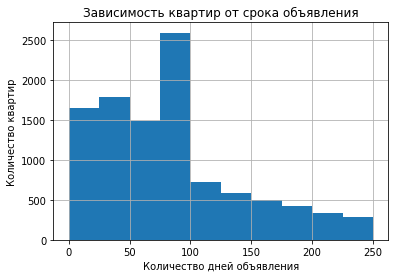

In [94]:
plt.hist(good_data['days_exposition'], bins=10, range=(0,250))
plt.grid()
plt.title('Зависимость квартир от срока объявления')
plt.xlabel('Количество дней объявления')
plt.ylabel('Количество квартир')

Среднее значение продажи составляет 163 дня, при этом медианное значение составляет 95 дней, оно более точно характеризует среднее время продажи, так как не зависит от аномалий. Следовательно в среднем продажа квартиры занимает 3-5 месяца.

Быстрыми продажами можно считать продажи состоявшиеся за 30-50 дней, а необычно долгие продажи более 232 дня.

**Исследуем факторы, которые больше всего влияют на общую(полную) стоимость объекта**:

In [95]:
good_data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.757466,-0.123600,-0.735299,0.725033
last_price,0.757466,1.000000,0.231158,-0.382764,0.949648
living_area,-0.123600,0.231158,1.000000,0.064388,0.235272
rooms,-0.735299,-0.382764,0.064388,1.000000,-0.243643
total_area,0.725033,0.949648,0.235272,-0.243643,1.000000


<AxesSubplot:title={'center':'Зависимость стоимости от общей площади квартир'}, xlabel='total_area'>

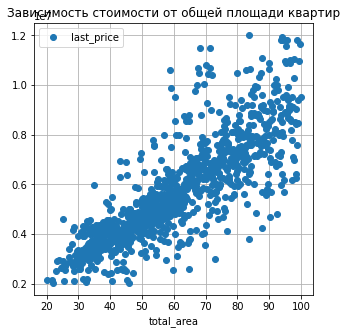

In [106]:
good_data.pivot_table(index='total_area', values='last_price') \
    .plot(grid=True, style='o', figsize=(5, 5), title='Зависимость стоимости от общей площади квартир')

<AxesSubplot:title={'center':'Зависимость стоимости от жилой площади квартир'}, xlabel='living_area'>

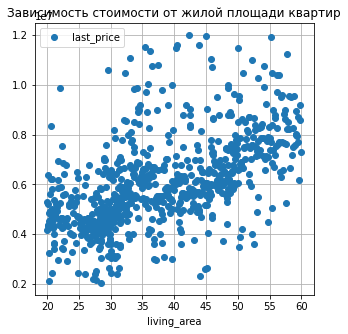

In [105]:
good_data.pivot_table(index='living_area', values='last_price') \
    .plot(grid=True, style='o', figsize=(5, 5), title='Зависимость стоимости от жилой площади квартир')

<AxesSubplot:title={'center':'Зависимость стоимости от площади кухни квартир'}, xlabel='kitchen_area'>

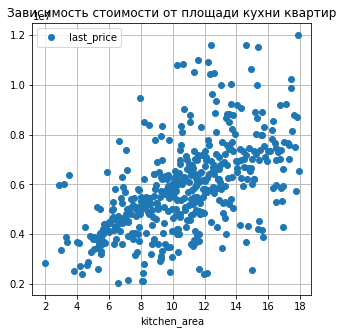

In [104]:
good_data.pivot_table(index='kitchen_area', values='last_price') \
    .plot(grid=True, style='o', figsize=(5, 5), title='Зависимость стоимости от площади кухни квартир')

<AxesSubplot:title={'center':'Зависимость стоимости от количества комнат'}, xlabel='rooms'>

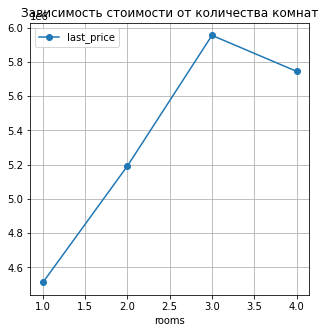

In [103]:
good_data.pivot_table(index='rooms', values='last_price') \
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость стоимости от количества комнат')

<AxesSubplot:title={'center':'Зависимость стоимости от типа этажа'}, xlabel='floor_type'>

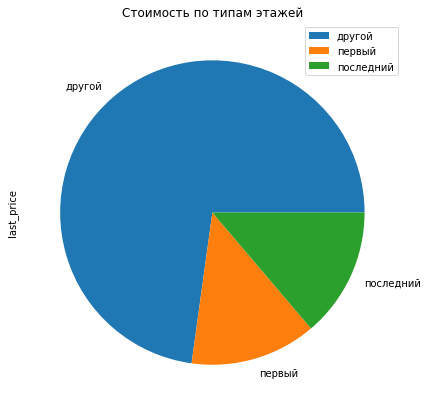

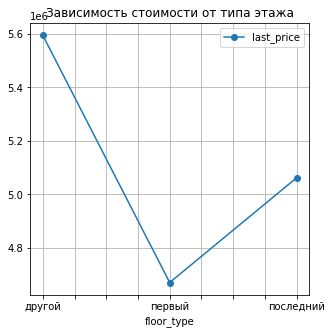

In [102]:
good_data.pivot_table(index='floor_type', values='last_price', aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), title='Стоимость по типам этажей')
good_data.pivot_table(index='floor_type', values='last_price') \
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость стоимости от типа этажа')

<AxesSubplot:title={'center':'Зависимость цены от дня недели объявления'}, xlabel='weekday_exposition'>

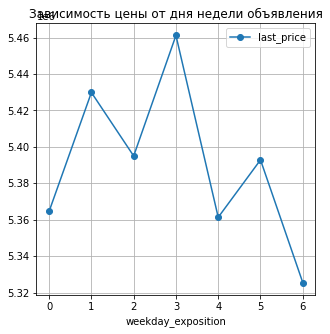

In [108]:
good_data.pivot_table(index='weekday_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от дня недели объявления')

<AxesSubplot:title={'center':'Зависимость цены от месяца объявления'}, xlabel='month_exposition'>

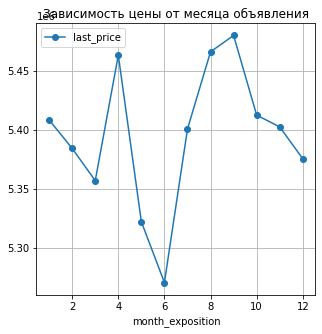

In [109]:
good_data.pivot_table(index='month_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от месяца объявления')

<AxesSubplot:title={'center':'Зависимость цены от года объявления'}, xlabel='year_exposition'>

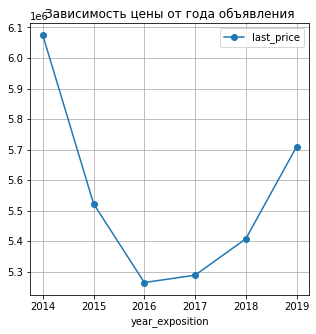

In [110]:
good_data.pivot_table(index='year_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от года объявления')

**Вывод**:

   - Чем больше общая площадь, тем выше стоимость. На графиках видна высокая корреляция.
   
   - Число комнат влияет на цену, чем больше комнат, тем больше цена. Самые дорогие квартиры с 3 комнатами. Тем не менее заивисимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре с малым числом комнат, но стоят дороже.
   
   - Первый и последний этаж влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Последний этаж несколько дороже. Наибольшая стоимость у квартир, расположенных на другом этаже.


**Исследуем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**:

In [111]:
mean_price = good_data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
mean_price.columns = ['count']
mean_price = mean_price.sort_values(by='count', ascending=False).head(10)
mean_price['price_square_meter'] = good_data.pivot_table(index='locality_name', values='one_square_meter').round(2)
mean_price.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
Санкт-Петербург,8788,102283.60
Пушкин,219,98765.83
Кудрово,183,91839.49
Парголово,141,84811.36
Мурино,227,79728.30
Шушары,264,73960.35
Колпино,230,72171.95
Гатчина,202,67942.69
Всеволожск,249,66018.30


**Вывод**:
    Наибольшая средняя стоимость квадратного метра и количество объявлений в Санкт-Петербурге. По количеству объявлений, в остальных пунктах списка от 129 до 264, примерно одинаково, что значительно меньше, чем в самом Санкт-Петербурге(так как сам город сильно больше по плотности застройки и населению). Из топ-10 наименьшая стоимость в Выборге и Всеволожске.

**Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра**:

In [112]:
good_data.query('locality_name == "Санкт-Петербург"')['city_centers_nearest_km'].describe()

count    8788.000000
mean       12.119254
std         4.521222
min         0.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        29.000000
Name: city_centers_nearest_km, dtype: float64

<AxesSubplot:title={'center':'Зависимость цены от расстояния до центра по Санкт-Петербургу'}, xlabel='city_centers_nearest_km'>

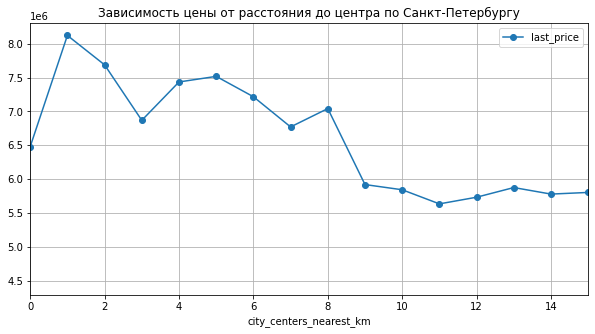

In [113]:
(
    good_data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5), title='Зависимость цены от расстояния до центра по Санкт-Петербургу')
)

In [114]:
(
    good_data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km < 16')
    .pivot_table(values='last_price', index='city_centers_nearest_km')
    .sort_values('last_price', ascending=False)
)

,last_price
city_centers_nearest_km,
1,8.122577e+06
2,7.688000e+06
5,7.517960e+06
4,7.435343e+06
6,7.217232e+06
8,7.042215e+06
3,6.868477e+06
7,6.771105e+06
0,6.480000e+06


**Вывод**: Самые дорогие квартиры в 1км от центра города. Непосредственно в центре квартиры дешевле(вероятно это связано с наибольшей зашумленностью от коммерческих помещений). Чем дальше от центра, тем меньше цены.

### Напишите общий вывод

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:

   **Изучили общую информацию о данных**
   
   _В данных 23699 записи. Есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения._
        
   **Выполнена предобработка данных**
   
   _Переименовали название столбца cityCenters_nearest на city_centers_nearest.
   Заполнили явные пропуски в таблице, и округлили значения.
   Изменили тип данных, в соответствии с данными находящимися в столбцах._
   Возможные причины появления пропусков:
   - Человеческий фактор.
   - Технические сбои.
   
   
   **Добавлены новые столбцы в таблицу**
   
   - one_square_meterr - цена квадратного метра объекта с точностью до двух знаков после запятой.
   - weekday_exposition - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
   - month_exposition - месяц публикации объявления.
   - year_exposition - год публикации объявления.
   - floor_type - тип этажа квартиры (значения — «первый», «последний», «другой»).
   - city_centers_nearest_km - расстояние до центра города в целых километрах._
    
    
   **Проведен исследовательский анализ данных**
   
   _На рынке самое большое предложение квартир с общей площадью от 28 до 60 кв. метров с максимумом приблизительно 100 кв. метров._
   
   _Больше всего продают квартир с жилой площадью с 27 кв. м по 36 кв. метров при этом прослеживается спад предложений в средней зоне 36-40 кв. метра._
    
   _Прослеживается тенденция что больше всего предложений с площадью кухни от 5 метров до 10._
    _Из гисторгаммы следует, что наиболее часто цена объекта составляет 3 - 6 миллниона._
    
   _Среди предложений больше всего двухкомнатных квартир. С увеличением комнат количество предложений снижается._
   _Среди большинства предложений высота составляет с 2.6 по 2.9 метров._
    
   _Менее ценными считаются квартиры на "первом" и "последнем" этаже. На круговой диаграмме заметно, что общее количество предложений "первого" и "последнего" этажа составляет почти 25% от общего количества._
    
   _Больше всего предложений о продаже квартир в пятиэтажных домах, а потом в девятиэтажках._
    
   _Больше всего предложений о продаже в спальных районах на окраинах города, на расстоянии 12000 -15000 метров._
    
   _Количество предложений не сильно зависит от расстояния до ближайшего парка. Большее расстояние до парка составляет 350 - 550 метров_
        
   **Изучено, как быстро продавались квартиры**
   
   _Среднее значение продажи составляет 163 дня, при этом медианное значение составляет 95 дней, оно более точно характеризует среднее время продажи, так как не зависит от аномалий. Следовательно в среднем продажа квартиры занимает 3-5 месяца._
   
   _Быстрыми продажами можно считать продажи состоявшиеся за 30-50 дней, а необычно долгие продажи более 232 дня._
   
   **Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта**
   
   _Чем больше общая площадь, тем выше стоимость. На графиках видна высокая корреляция._
   
   _Число комнат влияет на цену, чем больше комнат, тем больше цена. Самые дорогие квартиры с 3 комнатами. Тем не менее заивисимость ниже, чем у площади, так как бывают квартиры с большими по площади комнатами и квартиры в центре с малым числом комнат, но стоят дороже._
   
   _Первый и последний этаж влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Последний этаж несколько дороже. Наибольшая стоимость у квартир, расположенных на другом этаже._
   
   **Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**
   
   _Наибольшая средняя стоимость квадратного метра и количество объявлений в Санкт-Петербурге. По количеству объявлений, в остальных пунктах списка от 129 до 264, примерно одинаково, что значительно меньше, чем в самом Санкт-Петербурге(так как сам город сильно больше по плотности застройки и населению). Из топ-10 наименьшая стоимость в Выборге и Всеволожске._
       
   **Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга**
   
   _Самые дорогие квартиры в 1км от центра города. Непосредственно в центре квартиры дешевле(вероятно это связано с наибольшей зашумленностью от коммерческих помещений). Чем дальше от центра, тем меньше цены._
